### First time series
- create a sequence of dates using pd.date_range()
-  each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.


In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=12, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name)

6 <built-in method day_name of Timestamp object at 0x0000019B90D2A1B0>
0 <built-in method day_name of Timestamp object at 0x0000019B90D2A228>
1 <built-in method day_name of Timestamp object at 0x0000019B90D2A318>
2 <built-in method day_name of Timestamp object at 0x0000019B90D2A390>
3 <built-in method day_name of Timestamp object at 0x0000019B90D2A408>
4 <built-in method day_name of Timestamp object at 0x0000019B90D2A480>
5 <built-in method day_name of Timestamp object at 0x0000019B90D2A4F8>
6 <built-in method day_name of Timestamp object at 0x0000019B90D2A570>
0 <built-in method day_name of Timestamp object at 0x0000019B90D2A5E8>
1 <built-in method day_name of Timestamp object at 0x0000019B90D2A660>
2 <built-in method day_name of Timestamp object at 0x0000019B90D2A6D8>
3 <built-in method day_name of Timestamp object at 0x0000019B90D2A750>


#### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


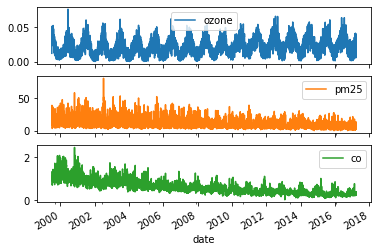

In [4]:
data = pd.read_csv('./data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


#### Compare annual stock price trends

In [18]:
yahoo = pd.read_csv('data/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo.head(3)

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86


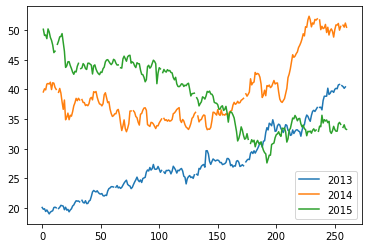

In [20]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
#     print(price_per_year)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

#### Set and change time series frequency
- We have seen how to assign a frequency to a DateTimeIndex, and then change this frequency. 
- set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [22]:
co = pd.read_csv('data/co_cities.csv')
co.date = pd.to_datetime(co.date) # convert str to datetime64
co.set_index('date', inplace=True)
co.head(3)

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


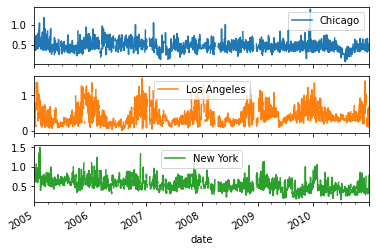

In [23]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

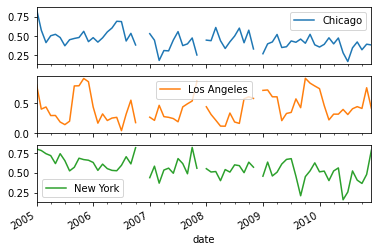

In [24]:

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()
